In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("loan_prediction.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

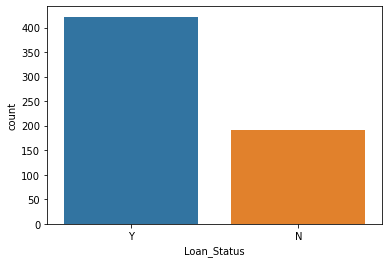

In [12]:
sns.countplot(data['Loan_Status'])

In [13]:
data.drop('Loan_ID', axis = 1, inplace = True)

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
data.fillna({"Gender": "Male",
             "Married": "Yes",
             "Dependents" : '0',
             "Self_Employed" : "No",
             "LoanAmount" : data['LoanAmount'].mean(),
             "Loan_Amount_Term" : data['Loan_Amount_Term'].mean(),
             "Credit_History": 1 }, inplace = True)

In [18]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data['Loan_Status'] = data['Loan_Status'].map({'Y' : 1, 'N': 0})

In [20]:
data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

<AxesSubplot:>

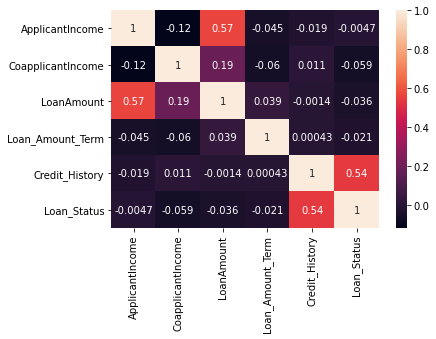

In [21]:
sns.heatmap(data.corr(),annot=True)

In [24]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(data[cat_cols], drop_first= True)

In [25]:
df

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0
610,1,1,0,0,1,0,0,0,0
611,1,1,1,0,0,0,0,0,1
612,1,1,0,1,0,0,0,0,1


In [26]:
data.drop(cat_cols, axis = 1, inplace = True)

In [27]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1
1,4583,1508.0,128.000000,360.0,1.0,0
2,3000,0.0,66.000000,360.0,1.0,1
3,2583,2358.0,120.000000,360.0,1.0,1
4,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1
610,4106,0.0,40.000000,180.0,1.0,1
611,8072,240.0,253.000000,360.0,1.0,1
612,7583,0.0,187.000000,360.0,1.0,1


In [28]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [29]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

data[num_cols] = scale.fit_transform(data[num_cols])

In [30]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.070489,0.000000,0.198860,0.74359,1.0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1


In [31]:
new_data = pd.concat([df, data], axis = 1)

In [32]:
new_data.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.198860,0.74359,1.0,1
1,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0,1
3,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637,0.74359,1.0,1
4,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.74359,1.0,1


In [33]:
x = new_data.drop('Loan_Status', axis = 1)

y = new_data['Loan_Status']

In [34]:
x.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.198860,0.74359,1.0
1,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214,0.74359,1.0
2,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0
3,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637,0.74359,1.0
4,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.74359,1.0


In [35]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [37]:
print(x_train.shape, y_train.shape)

(491, 14) (491,)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
model.coef_

array([[-0.06036651,  0.34239454, -0.22441145,  0.18946066,  0.27018585,
        -0.37245861,  0.06085407,  0.72446958,  0.24517117,  0.24282869,
        -0.80772318, -0.61118754, -0.36633534,  3.31920796]])

In [44]:
y_pred=model.predict_proba(x_train)

In [45]:
y_pred

array([[0.14600756, 0.85399244],
       [0.22739359, 0.77260641],
       [0.90616968, 0.09383032],
       [0.22830829, 0.77169171],
       [0.12201291, 0.87798709],
       [0.26397504, 0.73602496],
       [0.1610499 , 0.8389501 ],
       [0.22548266, 0.77451734],
       [0.34566864, 0.65433136],
       [0.19533088, 0.80466912],
       [0.23733952, 0.76266048],
       [0.30527267, 0.69472733],
       [0.16381677, 0.83618323],
       [0.29433261, 0.70566739],
       [0.20839981, 0.79160019],
       [0.17750845, 0.82249155],
       [0.25809974, 0.74190026],
       [0.31098019, 0.68901981],
       [0.23349688, 0.76650312],
       [0.92035398, 0.07964602],
       [0.26451677, 0.73548323],
       [0.15604675, 0.84395325],
       [0.3778199 , 0.6221801 ],
       [0.1380606 , 0.8619394 ],
       [0.20726293, 0.79273707],
       [0.913225  , 0.086775  ],
       [0.85732667, 0.14267333],
       [0.15303335, 0.84696665],
       [0.20369599, 0.79630401],
       [0.23574816, 0.76425184],
       [0.

In [46]:
test_predict = model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
y_pred=model.predict(x_test)

In [49]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

In [50]:
accuracy_score(y_test,y_pred)

0.8292682926829268

In [51]:
confusion_matrix(y_test,y_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [52]:
from sklearn.metrics import plot_confusion_matrix

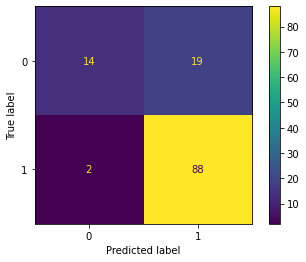

In [53]:
plot_confusion_matrix(model,x_test,y_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [56]:
from sklearn.metrics import precision_score,recall_score

In [57]:
precision_score(y_test,y_pred)

0.822429906542056

In [58]:
recall_score(y_test,y_pred)

0.9777777777777777

In [59]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

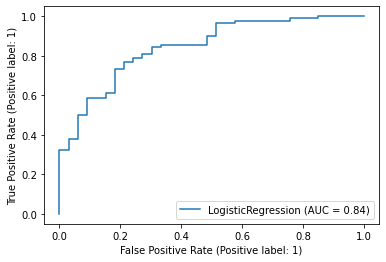

In [60]:
plot_roc_curve(model,x_test,y_test)

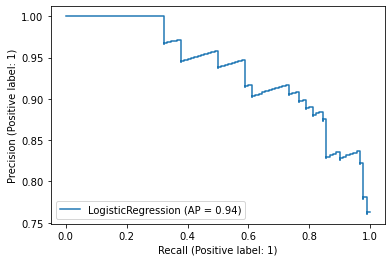

In [61]:
plot_precision_recall_curve(model,x_test,y_test)

In [62]:
model.predict_proba(x_test)[0]

array([0.16869461, 0.83130539])